In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
#import missingno as msno
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline


In [4]:
train = pd.read_csv("D:/Kaggle/bike_rental/train.csv")
test = pd.read_csv("D:/Kaggle/bike_rental/test.csv")

In [6]:
train.shape

(10886, 12)

In [7]:
train.head(4)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13


In [8]:
train.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [9]:
train["datetime"] = pd.to_datetime(train.datetime)

In [10]:
test["datetime"] = pd.to_datetime(test.datetime)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB


In [12]:
train["year"] = train.datetime.dt.year
train["month"] = train.datetime.dt.month
train["weekday"] = train.datetime.dt.weekday
train["weekday_name"] = train.datetime.dt.weekday_name
test["year"] = test.datetime.dt.year
test["month"] = test.datetime.dt.month
test["weekday"] = test.datetime.dt.weekday
test["weekday_name"] = test.datetime.dt.weekday_name


In [13]:
train.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,weekday,weekday_name
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,5,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,5,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,5,Saturday


In [14]:
test.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,weekday,weekday_name
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,3,Thursday
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3,Thursday
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3,Thursday


In [15]:
train["weekday_name"] = train.weekday_name.astype("category")
test["weekday_name"] = test.weekday_name.astype("category")

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
datetime        10886 non-null datetime64[ns]
season          10886 non-null int64
holiday         10886 non-null int64
workingday      10886 non-null int64
weather         10886 non-null int64
temp            10886 non-null float64
atemp           10886 non-null float64
humidity        10886 non-null int64
windspeed       10886 non-null float64
casual          10886 non-null int64
registered      10886 non-null int64
count           10886 non-null int64
year            10886 non-null int64
month           10886 non-null int64
weekday         10886 non-null int64
weekday_name    10886 non-null category
dtypes: category(1), datetime64[ns](1), float64(3), int64(11)
memory usage: 1.3 MB


In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 13 columns):
datetime        6493 non-null datetime64[ns]
season          6493 non-null int64
holiday         6493 non-null int64
workingday      6493 non-null int64
weather         6493 non-null int64
temp            6493 non-null float64
atemp           6493 non-null float64
humidity        6493 non-null int64
windspeed       6493 non-null float64
year            6493 non-null int64
month           6493 non-null int64
weekday         6493 non-null int64
weekday_name    6493 non-null category
dtypes: category(1), datetime64[ns](1), float64(3), int64(8)
memory usage: 615.5 KB


In [18]:
test["weekday"] = test.datetime.dt.dayofweek

In [19]:
train["weekday"] = train.datetime.dt.dayofweek

In [20]:
train["day"] = train.datetime.dt.day
train["hour"] = train.datetime.dt.hour
test["day"] = test.datetime.dt.day
test["hour"] = test.datetime.dt.hour

In [21]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,weekday,weekday_name,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,5,Saturday,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,5,Saturday,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,5,Saturday,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,5,Saturday,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,5,Saturday,1,4


In [22]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,weekday,weekday_name,day,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,3,Thursday,20,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3,Thursday,20,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3,Thursday,20,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3,Thursday,20,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3,Thursday,20,4


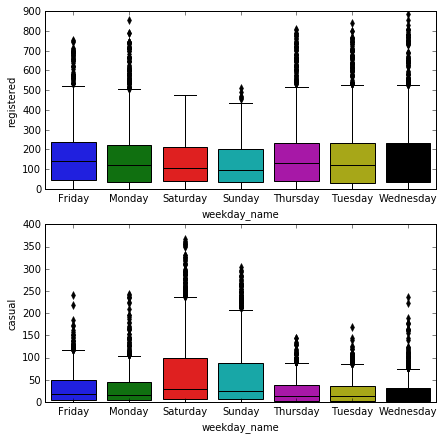

In [23]:
plt.figure(figsize=(7,7))
ax1 = plt.subplot(211)
sns.boxplot(x="weekday_name",y="registered",data=train,ax=ax1)
ax2 = plt.subplot(212)
sns.boxplot(x="weekday_name",y="casual",data=train,ax=ax2)

Casual hiring is more on weekends, registered hiring is more weekday

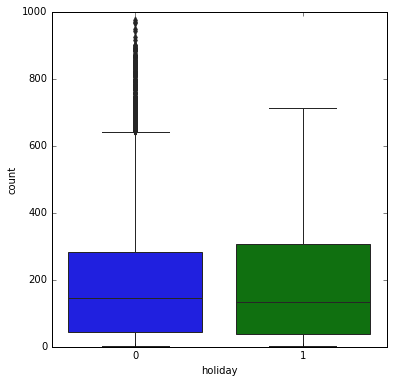

In [24]:
plt.figure(figsize=(6,6))
sns.boxplot(x="holiday",y="count",data=train)

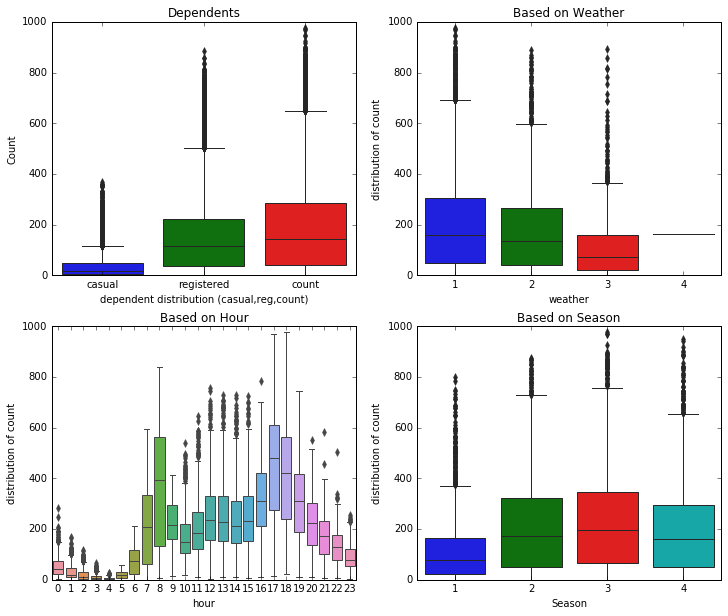

In [25]:
plt.figure(figsize=(12,10))
fig, ax = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)
sns.boxplot(data=train[['casual','registered', 'count']], ax = ax[0,0])
ax[0,0].set(xlabel = "dependent distribution (casual,reg,count)",ylabel="Count",title="Dependents")
sns.boxplot(x="weather",y="count",ax= ax[0,1],data=train)
ax[0,1].set(xlabel = "weather",ylabel = "distribution of count",title="Based on Weather")
sns.boxplot(x="hour",y="count",ax= ax[1,0],data=train)
ax[1,0].set(xlabel = "hour",ylabel = "distribution of count",title="Based on Hour")
sns.boxplot(x="season",y="count",ax= ax[1,1],data=train)
ax[1,1].set(xlabel = "Season",ylabel = "distribution of count",title="Based on Season")

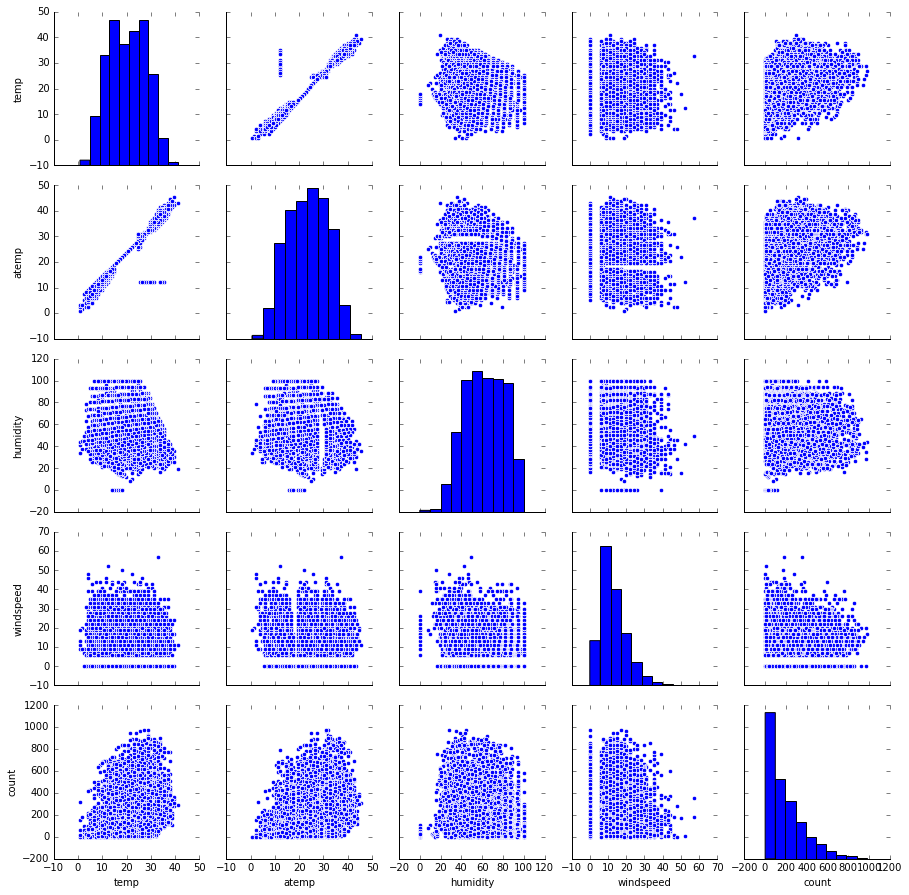

In [26]:
sns.pairplot(train[["temp","atemp","humidity","windspeed","count"]])

C:\Users\sarra\Anaconda2\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


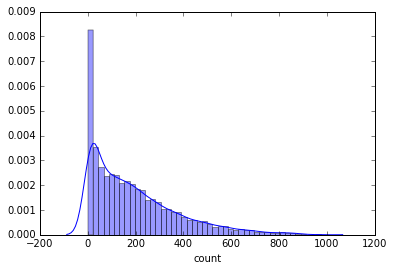

In [27]:
sns.distplot(train["count"])

In [28]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,weekday,day,hour
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,6.521495,3.013963,9.992559,11.541613
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,3.444373,2.004585,5.476608,6.915838
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,0.000000,1.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,4.000000,1.000000,5.000000,6.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,7.000000,3.000000,10.000000,12.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,10.000000,5.000000,15.000000,18.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,12.000000,6.000000,19.000000,23.000000


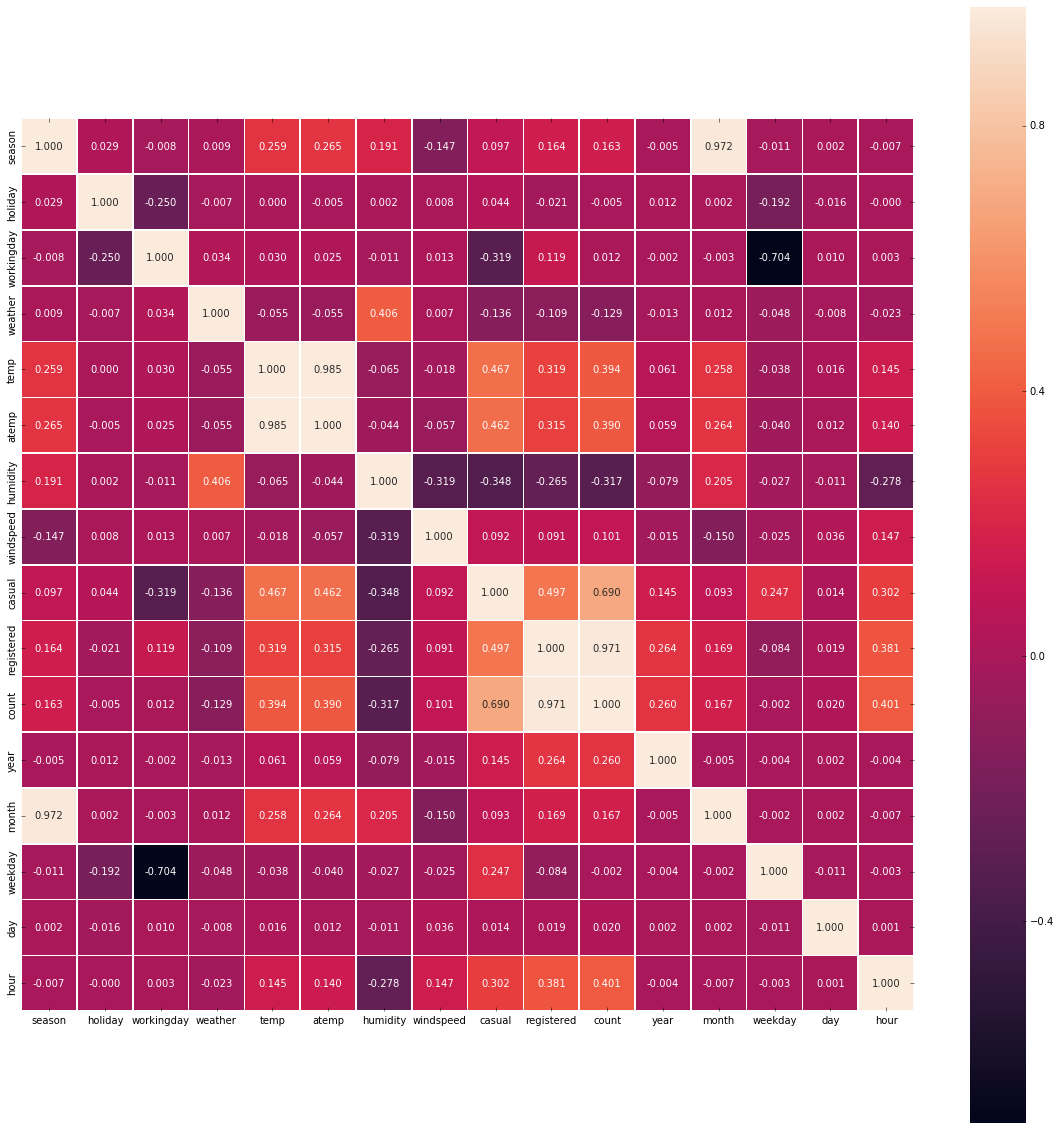

In [29]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, vmax=.98, annot= True, linewidths = 0.5, fmt = '.003f', square=True, ax = ax);

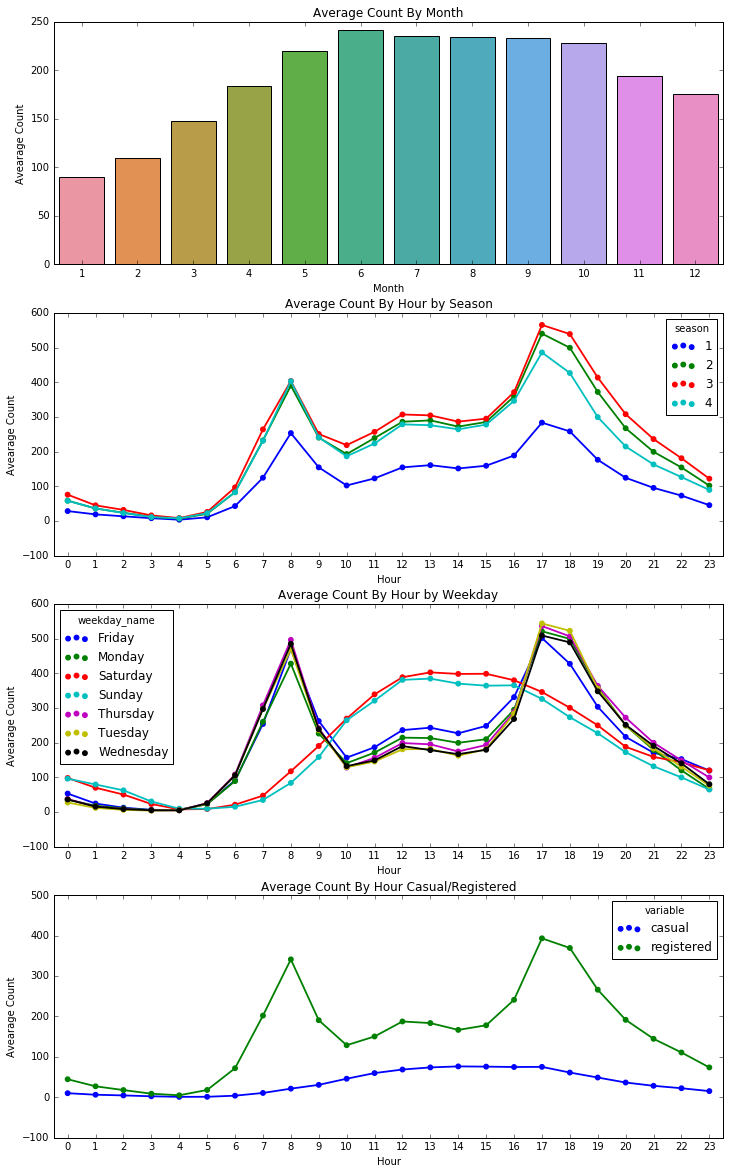

In [30]:
fig,(ax1,ax2,ax3,ax4)= plt.subplots(nrows=4)
fig.set_size_inches(12,20)
hueOrder = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
monthlyagg = pd.DataFrame(train.groupby("month")["count"].mean()).reset_index()
sns.barplot(x="month",y="count",data=monthlyagg,ax=ax1)
ax1.set(xlabel='Month', ylabel='Avearage Count',title="Average Count By Month")
hrslagg = pd.DataFrame(train.groupby(["hour","season"])["count"].mean()).reset_index()
sns.pointplot(x="hour",y="count",hue="season",data=hrslagg,ax=ax2)
ax2.set(xlabel='Hour', ylabel='Avearage Count',title="Average Count By Hour by Season")
hrwkdagg = pd.DataFrame(train.groupby(["hour","weekday_name"])["count"].mean()).reset_index()
sns.pointplot(x="hour",y="count",hue="weekday_name",data=hrwkdagg,ax=ax3)
ax3.set(xlabel='Hour', ylabel='Avearage Count',title="Average Count By Hour by Weekday")
hourmelt = pd.melt(train[["hour","casual","registered"]], id_vars=['hour'], value_vars=['casual', 'registered'])
hourmagg = pd.DataFrame(hourmelt.groupby(["hour","variable"],sort=True)["value"].mean()).reset_index()
sns.pointplot(x="hour",y="value",hue="variable",data=hourmagg,ax=ax4)
ax4.set(xlabel='Hour', ylabel='Avearage Count',title="Average Count By Hour Casual/Registered")

From above exploration, we can conclude following points:
* On weekday, we have peak hours of 7-9am and 4-7 pm (Office hours and this trend is seen with registered users)
* People tend to rent more during summer and fall (June, July August)
* Casual user rent most in weekend and mostly weekend hiring are between 10am - 6pm
*  Temp and atemp are highly correlated with each other, we can drop one of them in model (drop atemp). Though positively correlated to count as expected.
* Humidity is inversily correlated to count as expected.
* Windspeed has very weak correlation with count. We can drop it too. Probably try modelling with it and then without it to see if there is any impact.

Done with EDA. Now doing some feature engineering

In [31]:
train.columns.values

array(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'weekday', 'weekday_name', 'day', 'hour'],
      dtype=object)

In [32]:
test.columns.values

array(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'year', 'month', 'weekday',
       'weekday_name', 'day', 'hour'], dtype=object)

In [33]:
col_to_drop = ['datetime','atemp','windspeed','weekday','weekday_name']
y_casual = train["casual"]
y_reg = train["registered"]
y_count = train["count"]
y_to_drop = ["casual","registered","count"]
drop_in_train = col_to_drop + y_to_drop
drop_in_train

['datetime',
 'atemp',
 'windspeed',
 'weekday',
 'weekday_name',
 'casual',
 'registered',
 'count']

In [34]:
train["year"] = train.year.map({2011 : 0, 2012: 1})
test["year"] = test.year.map({2011 : 0 , 2012 : 1})

In [35]:
train.year.value_counts()

1    5464
0    5422
Name: year, dtype: int64

In [36]:
test.year.value_counts()

1    3270
0    3223
Name: year, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.model_selection import GridSearchCV

C:\Users\sarra\Anaconda2\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [38]:
x_train , x_test, y_train, y_test = train_test_split(train.drop(drop_in_train,axis=1), y_count, test_size=0.25,random_state=11)

In [39]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
np.sqrt(mean_squared_log_error(pred,y_test))

0.344668876067875

In [40]:
cvs = -cross_val_score(rf,x_train,y_train,cv=10,scoring= 'neg_mean_squared_log_error')
cvs

array([0.15816383, 0.12978374, 0.13123282, 0.14834459, 0.14879484,
       0.11631696, 0.11462609, 0.16154611, 0.13118344, 0.14696872])

In [41]:
models=[RandomForestRegressor(),AdaBoostRegressor(),BaggingRegressor(),SVR(),KNeighborsRegressor()]
model_names=['RandomForestRegressor','AdaBoostRegressor','BaggingRegressor','SVR','KNeighborsRegressor']
rmsle=[]
cross_vsc = []
d={}
for model in range (len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    cvsc = -cross_val_score(clf,x_train,y_train,cv=10,scoring = 'neg_mean_squared_log_error')
    cross_vsc.append(np.mean(cvsc))
    test_pred=clf.predict(x_test)
    rmsle.append(np.sqrt(mean_squared_log_error(test_pred,y_test)))
d={'Modelling Algo':model_names,'RMSLE':rmsle,'Cross_Val_SCore': cross_vsc}   
df = pd.DataFrame(d)
df

,Cross_Val_SCore,Modelling Algo,RMSLE
0,0.138571,RandomForestRegressor,0.342947
1,1.042578,AdaBoostRegressor,1.035864
2,0.141712,BaggingRegressor,0.336949
3,2.100188,SVR,1.432817
4,0.710739,KNeighborsRegressor,0.805515


In [46]:
# Random Forest Regressor tend to perform well
est = [100,150,200]
min_lf = [1,2,4]
param_dict = {'n_estimators':est,'min_samples_leaf':min_lf}
print(param_dict)

{'n_estimators': [100, 150, 200], 'min_samples_leaf': [1, 2, 4]}


In [47]:
grid = GridSearchCV(RandomForestRegressor(), param_grid = param_dict, cv=10,scoring = 'neg_mean_squared_log_error')
grid.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 150, 200], 'min_samples_leaf': [1, 2, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_log_error', verbose=0)

In [48]:
grid.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [51]:
print(-grid.best_score_)
print(grid.best_params_)

0.12923440211210652
{'n_estimators': 150, 'min_samples_leaf': 1}


In [52]:
rf_best = RandomForestRegressor(n_estimators=150)
cvsc = -cross_val_score(rf_best,x_train,y_train,cv=10,scoring = 'neg_mean_squared_log_error')
np.mean(cvsc)

0.12920026503092982

In [53]:
test_data = test.drop(col_to_drop,axis=1)

In [54]:
test_data.columns.values

array(['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity',
       'year', 'month', 'day', 'hour'], dtype=object)

In [55]:
rf_best.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [56]:
test_pred = rf_best.predict(x_test)
np.sqrt(mean_squared_log_error(test_pred,y_test))

0.3269190954510902

In [65]:
submit_pred = grid.predict(test_data)

In [66]:
submit_pred.shape


(6493L,)

In [67]:
datetimecol = test["datetime"]

In [68]:
subcsv = pd.DataFrame({'datetime':datetimecol, 'count':submit_pred})
subcsv

,count,datetime
0,12.953333,2011-01-20 00:00:00
1,5.533333,2011-01-20 01:00:00
2,5.560000,2011-01-20 02:00:00
3,3.393333,2011-01-20 03:00:00
4,2.800000,2011-01-20 04:00:00
5,9.060000,2011-01-20 05:00:00
6,33.246667,2011-01-20 06:00:00
7,93.186667,2011-01-20 07:00:00
8,199.366667,2011-01-20 08:00:00
9,114.453333,2011-01-20 09:00:00


In [69]:
subcsv.to_csv("D:/Kaggle/bike_rental/sub2.csv",columns=['datetime','count'],index=False)